# Observations

1. According to results of mouse l509, Capomulin appeared to effectively lower the tumor size in the mouse over time
2. There is a positive correlation (0.84) between the weight of the mice and the tumor size, therefore, maintaining a lower weight may reduce the risk of SCC tumors in mice
3. Based on the final tumor sizes of mice in the four drug regimens, Capomulin and Ramicane were more effective than Infubinol and Ceftamin

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [6]:
# Combine the data into a single dataset
df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = df.loc[df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [14]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = df.loc[df["Mouse ID"] == "g989",:]
dup_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# df2 = df[df["Mouse ID"].isin(dup_mouse)==False]
# duplicates_check = df2.loc[df2.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
# duplicates_check

df2 = df[df["Mouse ID"]!="g989"]
df2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [25]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()

248

# Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen = df2.groupby(["Drug Regimen"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = regimen["Tumor Volume (mm3)"].mean()
tumor_med = regimen["Tumor Volume (mm3)"].median()
tumor_var = regimen["Tumor Volume (mm3)"].var()
tumor_std = regimen["Tumor Volume (mm3)"].std()
tumor_sem = regimen["Tumor Volume (mm3)"].sem()

reg_summ_df = pd.DataFrame({"Mean Tumor Volume":tumor_mean,
                            "Median Tumor Volume":tumor_med,
                            "Tumor Volume Variance":tumor_var,
                            "Tumor Volume Std. Dev.":tumor_std,
                            "Tumor Volume Std. Err.":tumor_sem})
reg_summ_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
reg_summ_df2 = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
reg_summ_df2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

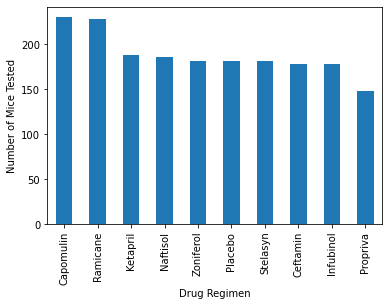

In [38]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = df2.groupby(["Drug Regimen"])["Timepoint"].count()
timepoints.sort_values(ascending=False).plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

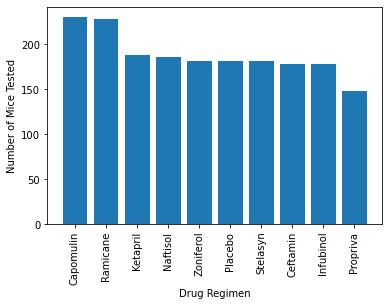

In [46]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints_sort = timepoints.sort_values(ascending=False)
xaxis = timepoints_sort.index.values
yaxis = timepoints_sort.values

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")

plt.bar(xaxis, yaxis, align='center' )
plt.show()

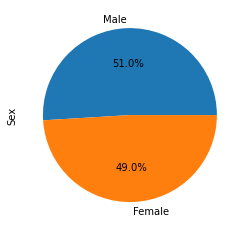

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = df2["Sex"].value_counts()
gender.plot.pie(autopct="%1.1f%%")
plt.show()

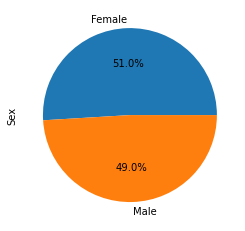

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, labels=("Female","Male"),autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

# Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
finaltumor = df2.groupby(["Mouse ID"])["Timepoint"].max()
finaltumor_df = pd.DataFrame(finaltumor)
# finaltumor_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
lasttime_df = pd.merge(df2, finaltumor_df, on=("Mouse ID","Timepoint"), how="right")
lasttime_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [64]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
vol_cap = []
vol_ram = []
vol_inf = []
vol_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in lasttime_df.iterrows():
    if row["Drug Regimen"] == "Capomulin": vol_cap.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == "Ramicane": vol_ram.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == "Infubinol": vol_inf.append(row["Tumor Volume (mm3)"])    
    if row["Drug Regimen"] == "Ceftamin": vol_cef.append(row["Tumor Volume (mm3)"])    
        
    # add subset 
summ_df = pd.DataFrame({"Capomulin":vol_cap,
                           "Ramicane":vol_ram,
                           "Infubinol":vol_inf,
                           "Ceftamin":vol_cef})

    # Determine outliers using upper and lower bounds
quartiles = summ_df["Capomulin"].quantile([.25,.5,.75])
cap_lowerq = quartiles[0.25]
cap_upperq = quartiles[0.75]
cap_iqr = upperq-lowerq

cap_lowerbound = cap_lowerq - (1.5*iqr)
cap_upperbound = cap_upperq + (1.5*iqr)

quartiles = summ_df["Ramicane"].quantile([.25,.5,.75])
ram_lowerq = quartiles[0.25]
ram_upperq = quartiles[0.75]
ram_iqr = upperq-lowerq

ram_lowerbound = ram_lowerq - (1.5*iqr)
ram_upperbound = ram_upperq + (1.5*iqr)

quartiles = summ_df["Infubinol"].quantile([.25,.5,.75])
inf_lowerq = quartiles[0.25]
inf_upperq = quartiles[0.75]
inf_iqr = upperq-lowerq

inf_lowerbound = inf_lowerq - (1.5*iqr)
inf_upperbound = inf_upperq + (1.5*iqr)

quartiles = summ_df["Ceftamin"].quantile([.25,.5,.75])
cef_lowerq = quartiles[0.25]
cef_upperq = quartiles[0.75]
cef_iqr = upperq-lowerq

cef_lowerbound = cef_lowerq - (1.5*iqr)
cef_upperbound = cef_upperq + (1.5*iqr)

print(f"Capomulin's potential outliers: {cap_lowerbound}, {cap_upperbound}")
print(f"Ramicane's potential outliers: {ram_lowerbound}, {ram_upperbound}")
print(f"Infubinol's potential outliers: {inf_lowerbound}, {inf_upperbound}")
print(f"Ceftamin's potential outliers: {cef_lowerbound}, {cef_upperbound}")


Capomulin's potential outliers: 15.161654099999993, 57.374923040000006
Ramicane's potential outliers: 14.344766809999996, 57.874709010000004
Infubinol's potential outliers: 36.83290494999999, 82.74144559000001
Ceftamin's potential outliers: 31.506375109999993, 81.51553277


C:\Users\schow\AppData\Local\Temp\ipykernel_20280\2192888666.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


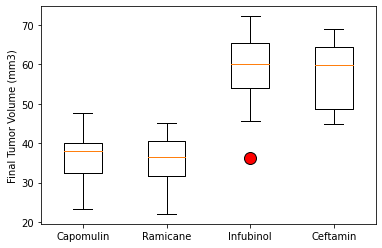

In [84]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_xticklabels(treatments)
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(summ_df, flierprops={'markerfacecolor':'red','markersize':12})
plt.show()

# Line and Scatter Plots

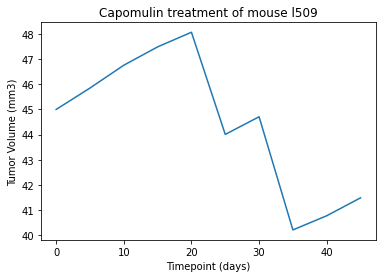

In [102]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#from above, mouse b128 was treated with Capomulin
lineplot = df2.loc[df2["Mouse ID"]=="l509",("Timepoint","Tumor Volume (mm3)")]

plt.plot(lineplot["Timepoint"], lineplot["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

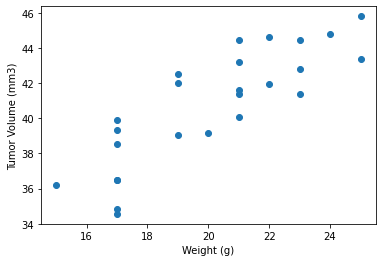

In [108]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df = df2.loc[df2["Drug Regimen"]=="Capomulin",("Mouse ID","Tumor Volume (mm3)","Weight (g)")]
cap_avg = cap_df.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

# Correlation and Regression

The correlation between mouse weight and the average tumor volume for the Capomulin regimen is 0.84


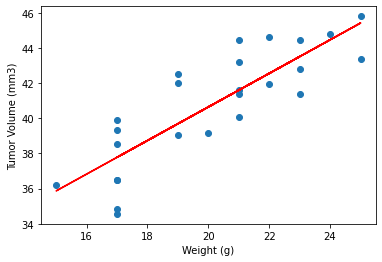

In [126]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and the average tumor volume for the Capomulin regimen is {correlation}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
regress = (cap_avg["Weight (g)"])*slope+intercept
plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
plt.plot(cap_avg["Weight (g)"],regress,'r')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()